# Exposure mode

## Author

Bradley Kelman

## Running Pyxel

In [1]:
import os
import re

import arcticpy
import numpy as np
import pandas as pd
import pyxel
import xarray as xr
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style
from bokeh.io import export_png, output_file, output_notebook, show
from bokeh.models import Label, Span
from bokeh.plotting import figure
from matplotlib import cm, colors
from matplotlib import pyplot as plt
from pyxel.notebook.html_representation import display_html
from pyxel.notebook.jupyxel import display_detector

# from tkinter import Tcl

In [2]:
# Display current version of Pyxel
print("Pyxel version:", pyxel.__version__)

Pyxel version: 1.13.1+33.g2f6ad96b


## Functions

In [3]:
def open_data_in_order(correct_order_list):
    dataset_lst = []
    for i in range(len(correct_order_list)):
        tmp = xr.open_dataset(f"{correct_order_list[i]}")
        dataset_lst.append(tmp)
    return dataset_lst

In [4]:
def get_filenames_correction(
    fits_path, bias_level, varying_rt_or_den, fixed_parameter, varying_parameter
):
    filenames = []
    for i in range(len(fixed_parameter)):
        for j in range(len(varying_parameter)):
            tmp = f"../../Results/correction_{bias_level}_{fixed_parameter[i]}_{varying_parameter[j]}.fits"
            filenames.append(tmp)
    return filenames

In [5]:
def get_filenames_residuals(
    fits_path, bias_level, varying_rt_or_den, trap_den, trap_rt
):
    filenames = []
    for i in range(len(trap_den)):
        for j in range(len(trap_rt)):
            tmp = f"../../Results/residuals/correction_{bias_level}_{trap_den[i]}_{trap_rt[j]}.fits"
            filenames.append(tmp)
    return filenames

In [6]:
def get_filenames_residuals(
    fits_path, bias_level, varying_rt_or_den, trap_den, trap_rt
):
    filenames = []
    for i in range(len(trap_den)):
        for j in range(len(trap_rt)):
            tmp = f"../../Results/residuals/correction_{bias_level}_{trap_den[i]}_{trap_rt[j]}.fits"
            filenames.append(tmp)
    return filenames

In [7]:
def open_multiple_fits_images(filepath):
    final_list = []
    final_image_data = []
    hdr_list = []
    for i in range(len(filepath)):
        tmp = get_pkg_data_filename(f"{filepath[i]}")
        final_list.append(tmp)
        tmp_image_data, tmp_hdr = fits.getdata(tmp, ext=0, header=True)
        final_image_data.append(tmp_image_data)
        hdr_list.append(tmp_hdr)
    return final_list, final_image_data, hdr_list

In [8]:
def produce_log_norm_png_images(
    fits_data_image, bias_level, varying_rt_or_den, filenames
):  # ,fixed_parameter,varying_parameter):
    for i in range(len(fits_data_image[1])):
        if bias_level == "no_bias":
            filename = filenames[i][88:-5]
        if bias_level == "10e_bias":
            filename = filenames[i][89:-5]
        if bias_level == "100e_bias":
            filename = filenames[i][90:-5]
        rx = re.compile(r"_")
        title = rx.sub(" ", filename)
        im = plt.imshow(
            fits_data_image[1][i][0:, 1200:], cmap="gray", norm=colors.LogNorm()
        )
        plt.colorbar(im)
        plt.title(f"{title}")
        plt.savefig(f"Graphs/{filename}.png", dpi=200)
        plt.close()

In [9]:
def produce_log_norm_png_images_same_scale(
    fits_data_image, bias_level, varying_rt_or_den, filenames
):  # ,fixed_parameter,varying_parameter):
    for i in range(len(fits_data_image[1])):
        if bias_level == "no_bias":
            filename = filenames[i][88:-5]
        if bias_level == "10e_bias":
            filename = filenames[i][89:-5]
        if bias_level == "100e_bias":
            filename = filenames[i][90:-5]
        rx = re.compile(r"_")
        title = rx.sub(" ", filename)
        im = plt.imshow(
            fits_data_image[1][i][0:, 1200:], cmap="gray", norm=colors.LogNorm()
        )
        plt.colorbar(im)
        plt.title(f"{title}")
        plt.savefig(f"Graphs/{filename}.png", dpi=200)
        plt.close()

In [10]:
def produce_log_norm_png_images_residuals(
    fits_data_image, bias_level, varying_rt_or_den, filenames, raw_or_fraction
):  # ,fixed_parameter,varying_parameter):
    for i in range(len(fits_data_image[1])):
        if bias_level == "no_bias":
            filename = filenames[i][109:-5]
        if bias_level == "10e_bias":
            filename = filenames[i][110:-5]
        if bias_level == "100e_bias":
            filename = filenames[i][111:-5]
        rx = re.compile(r"_")
        title = rx.sub(" ", filename)
        print(i)
        tmp = fits_data_image[1][i][0:, 1200:]
        im = plt.imshow((tmp), cmap="gray", norm=colors.LogNorm())
        plt.colorbar(im)
        plt.title(f"{title}")
        plt.savefig(f"Graphs/{filename}.png", dpi=200)
        plt.close()

In [11]:
def produce_log_norm_png_images_residuals_same_scale(
    fits_data_image, fileList, vmin, vmax, filepath, raw_percent_or_resid
):  # ,fixed_parameter,varying_parameter):
    for i in range(len(fits_data_image[1])):
        # split_fileList = fileList[i].split('/')#[-2]#[:-5]
        # arctic_version_and_noise = split_fileList[-3]
        # trap_params = split_fileList[-1][:-5]
        # arctic_version_and_noise_title = arctic_version_and_noise[11:].replace('_',' ')
        title = fileList[i].replace("_", " ")
        # title = arctic_version_and_noise_title +' '+ trap_params_title
        # rx = re.compile(r'_')
        # title = rx.sub(' ', fileList[i])
        tmp = abs(fits_data_image[1][i])  # [0:,1200:]
        im = plt.imshow(
            (tmp), cmap="gray", norm=colors.LogNorm(vmin=vmin, vmax=vmax, clip=True)
        )
        plt.colorbar(im)
        plt.title(f"{title}")
        plt.savefig(f"Graphs/{fileList[i]}_{vmin}_{vmax}_scale.png", dpi=250)
        plt.close()

In [12]:
def get_short_filenames_from_fileList(fileList, type="Not_raw"):
    filename_list = []
    for files in fileList:
        if type == "raw":

            batch_number = files.split("/")[7]  # .split('_')[1]
            batch_ID_number = files.split("/")[-1].split("_")[1]
            express_setting = files.split("/")[-2].split("_")[1]
            # signal_level = files.split('/')[-1].split('_')[-1][:-4]

        else:
            batch_number = files.split("/")[7]  # .split('_')[1]
            batch_ID_number = files.split("/")[-1].split("_")[2]
            express_setting = files.split("/")[-2].split("_")[1]
            # signal_level = files.split('/')[-1].split('_')[-1][:-4]
        tmp = f"{batch_number}_{batch_ID_number}_e_{express_setting}_{type}"  # _r_G0_{signal_level}'
        filename_list.append(tmp)

        # if len(files.split('/')[-1]) < 30:
        #     batch_number = files.split('/')[-1].split('_')[1]
        #     batch_ID_number = files.split('/')[-1].split('_')[2]
        #     # signal_level = files.split('/')[-1].split('_')[-1][:-4]
        #     tmp = f'batch_{batch_number}_{batch_ID_number}'#_r_G0_{signal_level}'
        #     filename_list.append(tmp)
        # else:
        #     batch_number = files.split('/')[7]
        #     batch_ID_number = files.split('/')[-1].split('_')[1]
        #     # signal_level = files.split('/')[-1].split('_')[-1][:-4]
        #     tmp = f'{batch_number}_{batch_ID_number}'#_r_G0_{signal_level}'
        #     filename_list.append(tmp)

    return filename_list

In [13]:
def get_filenames(fileList, optional=None):
    filename_list = []
    for files in fileList:
        if optional == "raw":
            tmp1 = files.split("/")[-1][:-5]
            tmp = f"{tmp1}_raw"
        else:
            tmp = files.split("/")[-1][:-5]
        filename_list.append(tmp)
    return filename_list

In [ ]:
filepath = "Graphs"


def produce_log_norm_png_images_residuals_same_scale(
    fits_data_image, fileList, filepath, raw_percent_or_resid
):  # ,fixed_parameter,varying_parameter):
    for i in range(len(fits_data_image[1])):
        # split_fileList = fileList[i].split('/')#[-2]#[:-5]
        # arctic_version_and_noise = split_fileList[-3]
        # trap_params = split_fileList[-1][:-5]
        # arctic_version_and_noise_title = arctic_version_and_noise[11:].replace('_',' ')
        title = fileList[i].replace("_", " ")
        m, s = np.mean(fits_data_image[1][i]), np.std(fits_data_image[1][i])
        # title = arctic_version_and_noise_title +' '+ trap_params_title
        # rx = re.compile(r'_')
        # title = rx.sub(' ', fileList[i])
        tmp = abs(fits_data_image[1][i])  # [0:,1200:]
        im = plt.imshow(
            (tmp), cmap="gray", norm=colors.LogNorm(vmin=m - s, vmax=m + s, clip=True)
        )
        plt.colorbar(im)
        plt.title(f"{title}")
        plt.savefig(f"{filepath}{raw_percent_or_resid}/{fileList[i]}.png", dpi=150)
        plt.close()

In [14]:
def get_fileList(directorypath, optional=""):
    fileList = []
    count = 0

    for dirname, dirnames, filenames in os.walk(directorypath):
        for filename in filenames:
            if filename.endswith(f"{optional}.fits"):
                fileList.append(f"{dirname}/{filename}")
                count = count + 1
    return Tcl().call("lsort", "-dict", fileList)

In [ ]:
def save_array_as_png_files(image, savename):
    im = plt.imshow((image), cmap="gray", vmin=-4, vmax=5)

    plt.colorbar(im)
    # plt.xlim(2500,0)
    plt.ylim(0, 2300)
    plt.xlabel("Serial pixel number")
    plt.ylabel("Parallel pixel number")
    plt.savefig(f"png_files/{savename}.png", dpi=200)

In [ ]:
filepath = "Graphs/"


def produce_log_norm_png_images_residuals_same_scale(
    fits_data_image, fileList, filepath, raw_percent_or_resid
):  # ,fixed_parameter,varying_parameter):
    for i in range(len(fits_data_image[1])):
        # split_fileList = fileList[i].split('/')#[-2]#[:-5]
        # arctic_version_and_noise = split_fileList[-3]
        # trap_params = split_fileList[-1][:-5]
        # arctic_version_and_noise_title = arctic_version_and_noise[11:].replace('_',' ')
        title = fileList[i].replace("_", " ")
        m, s = np.mean(np.abs(fits_data_image[1][i])), np.std(
            np.abs(fits_data_image[1][i])
        )
        # title = arctic_version_and_noise_title +' '+ trap_params_title
        # rx = re.compile(r'_')
        # title = rx.sub(' ', fileList[i])
        tmp = abs(fits_data_image[1][i])  # [0:,1200:]
        vmin = m - s
        if vmin < 0:
            vmin = 0.001
        im = plt.imshow(
            (tmp), cmap="gray", norm=colors.LogNorm(vmin=vmin, vmax=m + s, clip=True)
        )
        plt.colorbar(im)
        plt.title(f"{title}")
        plt.savefig(f"{filepath}/{raw_percent_or_resid}/{fileList[i]}.png", dpi=150)
        plt.close()

## Correction images

In [15]:
input_file = ["../../data/2D/cti_free_v5_no_bias.fits"]
input_images = open_multiple_fits_images(input_file)

In [17]:
target_file = ["../../data/2D/damaged_v5_no_bias.fits"]
target_images = open_multiple_fits_images(target_file)

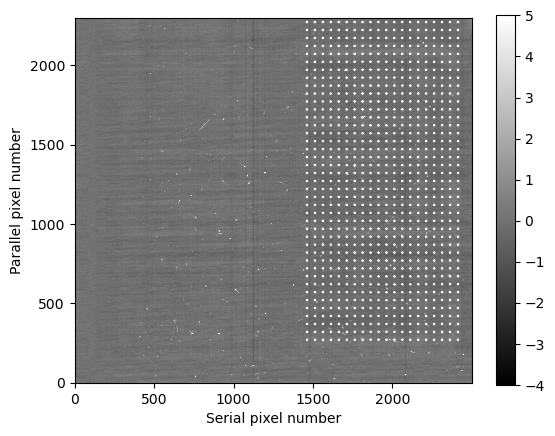

In [100]:
save_array_as_png_files(input_images[1][0], "original_input")

In [123]:
produce_log_norm_png_images_residuals_same_scale(
    corrected_raw_images, corrected_raw_images_filenames, filepath, "raw"
)  # ,fixed_parameter,varying_parameter):

In [ ]:
directorypath_raw = "../Results/2D/raw/"

In [ ]:
produce_log_norm_png_images_residuals_same_scale(fits_data_image,fileList,filepath,raw_percent_or_resid):#,fixed_parameter,varying_parameter):